In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter
from scipy.interpolate import CubicSpline
from my_plot import set_size
import seaborn as sns
width =  508.0
widthcol = 244
plt.rcParams['font.size']=12

from matplotlib.ticker import LogLocator

%matplotlib widget

In [2]:
f =  ScalarFormatter(useOffset=False, useMathText=True)
f.set_scientific(True)
f.set_powerlimits((0, 0))

def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        coefficient=float(coefficient)
        if (coefficient == 1.00):
            return f"$ 10^{{{exponent}}}$"  # Notazione LaTeX
        else: 
            return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX

In [3]:
K = 1.380649e-23 # J / K
vc = 299792458 #m / s
h_pl = 6.62607015e-34 #J*s
T = 2.72548 #K

In [4]:
G = lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2 * (2*K**3*T**3)/(vc**2*h_pl**2)
Y = lambda x: G(x) * ( x* (np.exp(x)+1)/(np.exp(x)-1)-4 ) 
M = lambda x: G(x)* (0.4561-1.0/x) 

In [5]:
mu = 1.3369312210209309e-05
y = 1/4 * 1e-5

In [6]:
z1 = np.geomspace(1.0e+2,5.0e+6,500)

## Green functions over all the redshift, hubble cooling and Xe are turned down

In [7]:
folder = 'outputs/fullgreen3/batch/PDE-non-linear'
x = []
DT = []
DI_N = []

z = []
Te = []
Tz = []

Xe=[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)


    a = op.iloc[:, 0].values
    x.append(a)
    b = op.iloc[:, 4].values
    DT.append(b)
    e = op.iloc[:, 6].values
    DI_N.append(e)


    if ((i>8) and (i<99)):
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_00{i+1}.dat")
    else: 
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_{i+1}.dat")

    op2 = pd.read_csv(file_path2, skiprows=6, delimiter=' ', header=None)
    d= op2.iloc[:,0]
    z.append(d)
    e= op2.iloc[:,2]
    Te.append(e)
    f = op2.iloc[:,1]
    Tz.append(f)     


    #if ((i>8) and (i<99)):
    #    file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_0{i+1}.dat")
    #elif(i<9):
    #    file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_00{i+1}.dat")
    #else: 
    #    file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_{i+1}.dat")
    #
    #op3 = pd.read_csv(file_path3, skiprows=6, delimiter=' ', header=None)
#
    #g = op3.iloc[:,1]
    #Xe.append(g)

In [8]:
x = np.array(x)
nu = K *x * int(Tz[499][3590]) /h_pl   #transform everythig in the frequency today

In [9]:
folder = 'outputs/fullgreen3/batch/PDE-non-linear/Greens'

z_vis= []
Jbb =[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)


    op = pd.read_csv(file_path, skiprows= lambda x: x not in [4], delimiter=' ', header=None)
    Jbb.append(op.iat[0,10])
    z_vis.append(op.iat[0,1])

We don't want to plot all the lines together, they are too many. We can split before the recombination (z = 2000). Recombination happens at 1100, look when is better to split for not having a busy picture

56


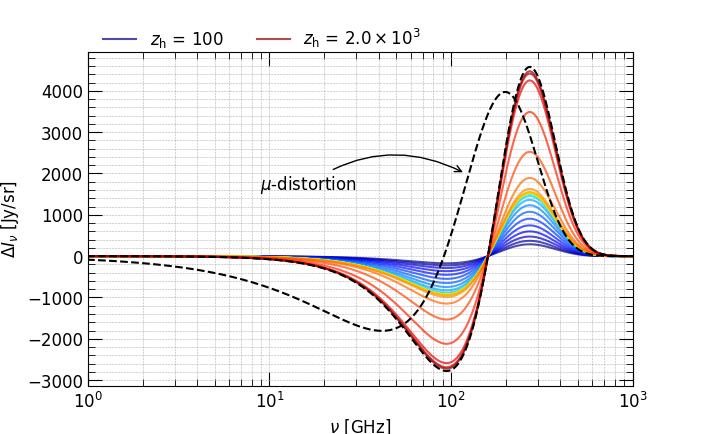

In [ ]:
colors = plt.colormaps['jet'].resampled(56)

fig, ax1 = plt.subplots(1, 1, figsize=set_size(width))
col = 0
for i in range(len(z1)):
    if((z1[i]<2000) and (i%5==0)):
        ax1.plot(nu[i]/1e+9, DI_N[i], label=f"$z_{{\\rm h}}$ = {sci_notation(z1[i])}", color = colors(col), alpha = 0.7)
        col = col +2
print(col)
ax1.plot(nu[i]/1e+9,Y(x[i])*y*1e26, color = "black", linestyle = "dashed",linewidth=1.5)
ax1.plot(nu[i]/1e+9,M(x[i])*mu*1e26, color = "black", linestyle = "dashed",linewidth=1.5)


ax1.set_xscale('log')
#ax1.set_ylim([1e+0, 5e+3])
ax1.set_xlim([1e+0, 1e+3])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")
ax1.set_xlabel("$\\nu$ [GHz]")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)

#to set labels above the plot 
handles, labels = plt.gca().get_legend_handles_labels()
labels[-1]=f"$z_{{\\rm h}}$ = {sci_notation(2e3)}"
labels[0]=f"$z_{{\\rm h}}$ = {100}"
selected_handles = [handles[0], handles[-1]]
selected_labels = [labels[0], labels[-1]]
plt.legend(selected_handles, 
    selected_labels, 
    loc="upper left", 
    bbox_to_anchor=(0, 1.12),  # Posizione fuori dal grafico
    ncol=2,  # Numero di colonne
    frameon=False  
    )

plt.annotate('$\mu$-distortion', xy=(1.2e2, 2e3), xycoords='data', xytext=(3e1, 2e3), textcoords='data', arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3,rad = -0.3"),horizontalalignment='right', verticalalignment='top')

plt.savefig('outputs/p4p/lateGFI.pdf', dpi=300,bbox_inches="tight")
plt.show()


28


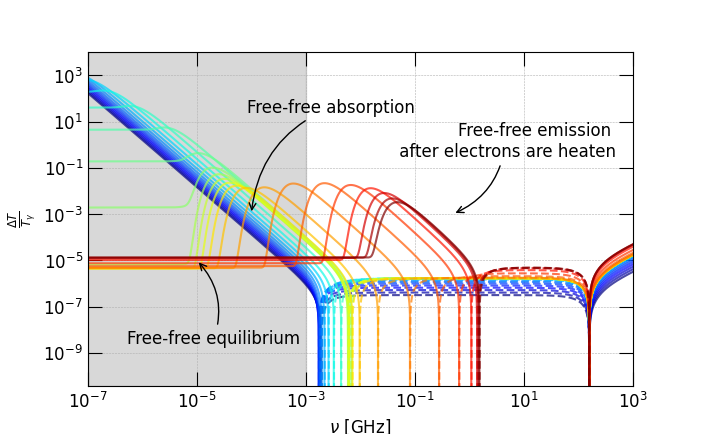

In [11]:

colors = plt.colormaps['jet'].resampled(28)
fig2, ax2 = plt.subplots(1, 1, figsize=set_size(width))
# Plot per DT2 (secondo subplot)
col = 0
for i in range(len(z1)):
    if((z1[i]<2000) and (i%5==0)):
        ax2.plot(nu[i]/1e9, DT[i], color = colors(col), alpha = 0.7)
        ax2.plot(nu[i]/1e9, -DT[i], color = colors(col), linestyle= "dashed", alpha = 0.7)
        col += 1
print(col)


ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([1e-7, 1e+3])
#ax2.set_ylim([-0.5e-3, 3e+3])

ax2.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=50))
ax2.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=50))

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax2.set_ylabel("$\\frac{\Delta T}{T_{\gamma}}$")
ax2.set_xlabel("$\\nu$ [GHz]")

ax2.grid(True, which = 'both',  linestyle='--', linewidth=0.4)

ax2.axvspan(1e-7,1e-3, color='gray', alpha=0.3)  # alpha per la trasparenza

plt.annotate('Free-free emission \n after electrons are heaten', xy=(5e-1, 1e-3), xycoords='data', xytext=(5e2, 1e1), textcoords='data', arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3,rad = -0.3"),horizontalalignment='right', verticalalignment='top')
plt.annotate('Free-free absorption', xy=(1e-4, 1e-3), xycoords='data', xytext=(1e-1, 100), textcoords='data', arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3,rad = 0.3"),horizontalalignment='right', verticalalignment='top')
plt.annotate('Free-free equilibrium', xy=(1e-5, 1e-5), xycoords='data', xytext=(8e-4, 1e-8), textcoords='data', arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3,rad = 0.3"),horizontalalignment='right', verticalalignment='top')

#ax1.yaxis.set_major_formatter(ScalarFormatter())    
#ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.savefig('outputs/p4p/lateGFT.pdf', dpi=300,bbox_inches="tight")
plt.show()

we want to split late times in high and low frequencies, but how?

In [12]:
nu[i]

array([4.16732382e+01, 4.21885054e+01, 4.27101436e+01, ...,
       6.20946455e+12, 6.23019055e+12, 6.25098574e+12])

36


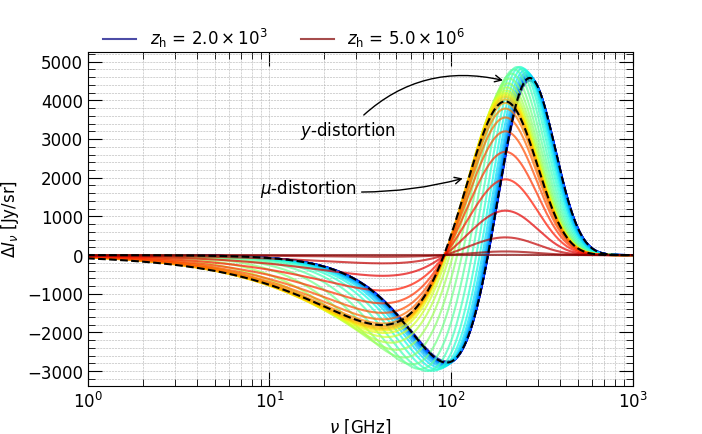

In [13]:
colors = plt.colormaps['jet'].resampled(36)

fig, ax1 = plt.subplots(1, 1, figsize=set_size(width))
col = 0
for i in range(len(z1)):
    if((z1[i]>2000) and (i%10==0)):
        ax1.plot(nu[i]/1e+9, DI_N[i], label=f"$z_{{\\rm h}}$ = {sci_notation(z1[i])}", color = colors(col), alpha = 0.7)
        col = col +1
print(col)

ax1.plot(nu[i]/1e+9,M(x[i])*mu*1e26, color = "black", linestyle = "dashed",linewidth=1.5)
ax1.plot(nu[i]/1e+9,Y(x[i])*y*1e26, color = "black", linestyle = "dashed",linewidth=1.5)


ax1.set_xscale('log')
#ax1.set_ylim([1e+0, 5e+3])
ax1.set_xlim([1e+0, 1e+3])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")
ax1.set_xlabel("$\\nu$ [GHz]")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)


handles, labels = plt.gca().get_legend_handles_labels()
labels[-1]=f"$z_{{\\rm h}}$ = {sci_notation(5e6)}"
labels[0]=f"$z_{{\\rm h}}$ = {sci_notation(2e3)}"
selected_handles = [handles[0], handles[-1]]
selected_labels = [labels[0], labels[-1]]
plt.legend(selected_handles, 
    selected_labels, 
    loc="upper left", 
    bbox_to_anchor=(0, 1.12),  # Posizione fuori dal grafico
    ncol=2,  # Numero di colonne
    frameon=False  
    )

plt.annotate('$\mu$-distortion', xy=(1.2e2, 2e3), xycoords='data', xytext=(3e1, 2e3), textcoords='data', arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3,rad = 0.1"),horizontalalignment='right', verticalalignment='top')
plt.annotate('$y$-distortion', xy=(2e2, 4.5e3), xycoords='data', xytext=(5e1, 3.5e3), textcoords='data', arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3,rad = -0.3"),horizontalalignment='right', verticalalignment='top')

plt.savefig('outputs/p4p/earlyGFI.pdf', dpi=300,bbox_inches="tight")
plt.show()



36


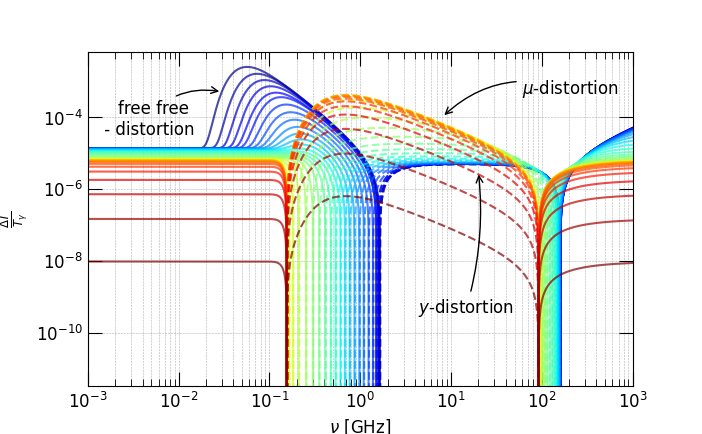

In [14]:

colors = plt.colormaps['jet'].resampled(36)
fig2, ax2 = plt.subplots(1, 1, figsize=set_size(width))
# Plot per DT2 (secondo subplot)
col = 0
for i in range(len(z1)):
    if((z1[i]>2000) and (i%10==0)):
        ax2.plot(nu[i]/1e9, DT[i], color = colors(col), alpha = 0.7)
        ax2.plot(nu[i]/1e9, -DT[i], color = colors(col), linestyle= "dashed", alpha = 0.7)
        col += 1
print(col)


ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([1e-3, 1e+3])
#ax2.set_ylim([-0.5e-3, 3e+3])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax2.set_ylabel("$\\frac{\Delta T}{T_{\gamma}}$")
ax2.set_xlabel("$\\nu$ [GHz]")

ax2.grid(True, which = 'both',  linestyle='--', linewidth=0.4)

#ax1.yaxis.set_major_formatter(ScalarFormatter())    
#ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
plt.annotate('$\mu$-distortion', xy=(8e0, 1e-4), xycoords='data', xytext=(6e1, 3e-4), textcoords='data', arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3,rad = 0.3"),horizontalalignment='left', verticalalignment='bottom')
plt.annotate('free free \n - distortion', xy=(3e-2, 5e-4), xycoords='data', xytext=(1.5e-2, 3e-4), textcoords='data', arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3,rad = -0.3"),horizontalalignment='right', verticalalignment='top')
plt.annotate('$y$-distortion', xy=(20, 3e-6), xycoords='data', xytext=(5e1, 1e-9), textcoords='data', arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3,rad = 0.1"),horizontalalignment='right', verticalalignment='top')
# Aggiusta il layout
plt.savefig('outputs/p4p/earlyGFT.pdf', dpi=300,bbox_inches="tight")
plt.show()

In [15]:
Jref= lambda x:  np.exp(-(x/1.98e+6)**(5/2)) 
z_vis = np.array(z_vis)


In [16]:
density = np.zeros(len(z1))
temp = np.zeros(len(z1))

rho_cmb = 8 * (np.pi)**5*K**4/(15 *vc**3 * h_pl**3)*Tz[499][3590]**4
#rho_cmb= 

for j in range (len(z1)):
    for i in range (len(x[j])-1):
        h = x[j][i+1] - x[j][i]
        temp[j] = temp[j] + DI_N[j][i]*h
    density[j] = (4*np.pi*K* Tz[499][3590]  /h_pl/vc) / rho_cmb * 1e-26 * temp[j]  



I = density / (1e-5)


print(rho_cmb)

4.3475033584090177e-14


Theoretical visibility function vs the one integrated by the distortion

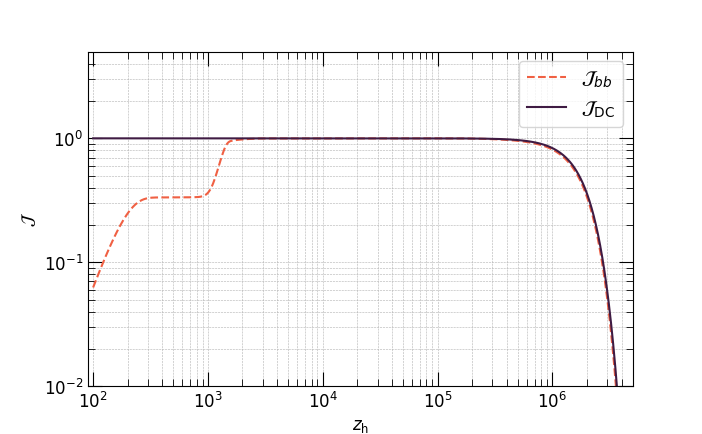

In [17]:
#Plot using the output and not my function integrated
colors2=sns.color_palette("rocket",5) #also nice
lines =  ['-', '--', '-.', '.', ':']
Jbb = np.array(Jbb)
fig, ax = plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Late time visibility function with hubble cooling ")

ax.plot(z_vis, Jbb, color = colors2[3], label= "$\mathcal{J}_{bb}$",linestyle = "dashed")
#ax.plot(z_vis, -Jbb, color = "purple",linestyle = "dashed")


ax.plot(z_vis, Jref(z_vis), color = colors2[0],label="$\mathcal{J}_{\\rm DC}$")
#ax.plot(z_vis, -Jref(z_vis), color = "black",linestyle = "dashed")



ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([90, 5e6])
ax.set_ylim([1e-2, 5])

#ax1.set_title("All $\Delta$ I_N curves")

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax.set_ylabel("$\mathcal{J}$")
ax.set_xlabel("$z_{\mathrm{h}}$")

ax.grid(True, which = 'both',  linestyle='--', linewidth=0.4)

#ax1.yaxis.set_major_formatter(ScalarFormatter())    
#ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
ax.legend(fontsize= 14)
plt.savefig('outputs/p4p/fullJbb.pdf', dpi=300,bbox_inches="tight")
plt.show()



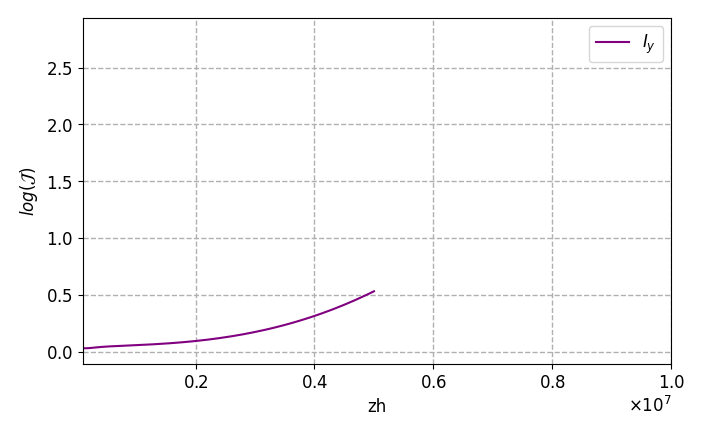

In [18]:
#Plot using the output and not my function integrated


fig, ax = plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Late time visibility function with hubble cooling ")

ax.plot(z_vis, -(np.log(I)-np.log(Jref(z_vis))), color = "purple", label= "$I_y$")
#ax.plot(z_vis, , color = "black",label="$\mathcal{J}ref = e^{-(z/z_{\mu})^{5/2}}$")

#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim([1e5, 1e7])
ax.set_ylabel("$log(\mathcal{J})$")
ax.set_xlabel("zh")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()





ax.yaxis.set_major_formatter(ScalarFormatter())    
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

ax.xaxis.set_major_formatter(ScalarFormatter())    
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

plt.tight_layout()
plt.show()

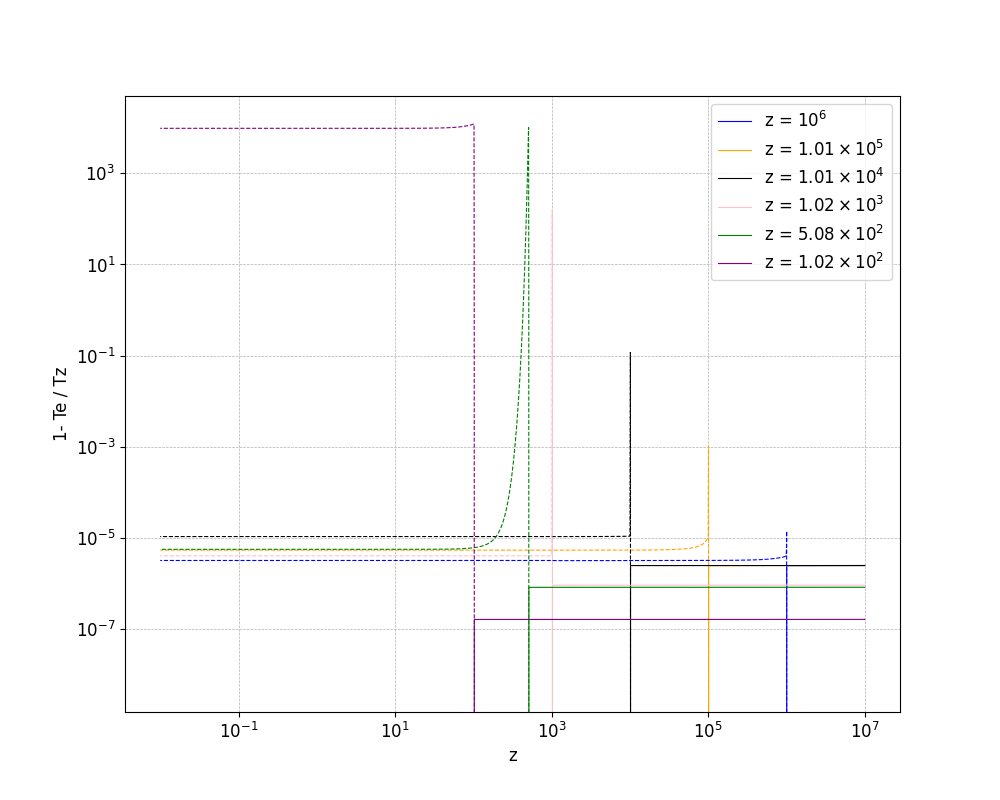

In [19]:
fig, ax = plt.subplots( figsize=(10,8))

for i in range (len(z1)):
    if(z1[i]>1e6):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "blue", label=f"z = {sci_notation(z1[i])}",linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "blue", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e5):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "orange",label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "orange", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e4):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "black", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "black", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e3):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "pink", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "pink", linestyle = "dashed")
        break


for i in range (len(z1)):
    if(z1[i]>5e2):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "green", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "green", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e2):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "purple", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "purple", linestyle = "dashed")
        break



ax.set_xlabel("z")
ax.set_ylabel("1- Te / Tz")
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([1e2, 1e7])
ax.grid(True, which = 'both',  linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)

In [20]:
#fig, ax = plt.subplots( figsize=(10,8))
#
##for i in range (len(z1)):
#    #if(i%4==0):
#ax.plot(z[0], Xe[0], linewidth= "0.8", color = colors(0), linestyle = "solid")
##ax.plot(z[0], -Xe[0], linewidth= "0.8", color = colors(0), linestyle = "dashed")
#
#
#
#
#ax.set_xlabel("z")
#ax.set_ylabel("Xe")
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim([1e2, 1e7])
#ax.grid(True, which = 'both',  linestyle='--', linewidth=0.5)
#ax.legend(fontsize=12)

In [21]:
#z1[250]
#rev_z = z[250][::-1]
#rev_Xe = Xe[250][::-1]
#
#Xe_int = CubicSpline(rev_z, rev_Xe)

### Introducing Xe

In [22]:
folder = 'outputs/full_gf_xe/batch/PDE-non-linear'
x2 = []
DT2 = []
DI_N2 = []

z2 = []
Te2 = []
Tz2 = []

Xe2=[]
zxe =[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)


    a = op.iloc[:, 0].values
    x2.append(a)
    b = op.iloc[:, 4].values
    DT2.append(b)
    e = op.iloc[:, 6].values
    DI_N2.append(e)


    if ((i>8) and (i<99)):
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_00{i+1}.dat")
    else: 
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_{i+1}.dat")

    op2 = pd.read_csv(file_path2, skiprows=6, delimiter=' ', header=None)
    d= op2.iloc[:,0]
    z2.append(d)
    e= op2.iloc[:,2]
    Te2.append(e)
    f = op2.iloc[:,1]
    Tz2.append(f)     


    #if ((i>8) and (i<99)):
    #    file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_0{i+1}.dat")
    #elif(i<9):
    #    file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_00{i+1}.dat")
    #else: 
    #    file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_{i+1}.dat")
    #
    #op3 = pd.read_csv(file_path3, skiprows=6, delimiter=' ', header=None)
#
    #g = op3.iloc[:,1]
    #Xe2.append(g)
    #h = op3.iloc[:,0]
    #zxe.append(h)

In [23]:
x2 = np.array(x2)
nu2 = K *x2 * int(Tz2[499][3590]) /h_pl   #transform everythig in the frequency today

In [24]:
folder = 'outputs/full_gf_xe/batch/PDE-non-linear/Greens'

z_vis2= []
Jbb2 =[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)


    op = pd.read_csv(file_path, skiprows= lambda x: x not in [4], delimiter=' ', header=None)
    Jbb2.append(op.iat[0,10])
    z_vis2.append(op.iat[0,1])

In [25]:
density2 = np.zeros(len(z1))
temp = np.zeros(len(z1))

for j in range (len(z1)):
    for i in range (len(x[j])-1):
        h = x[j][i+1] - x[j][i]
        temp[j] = temp[j] + DI_N[j][i]*h
    density2[j] = (4*np.pi*K* Tz[499][3590]  /h_pl/vc) / rho_cmb * 1e-26 * temp[j]  

I2 = density2 / (1e-5)

Theoretical J vs numerical integrated

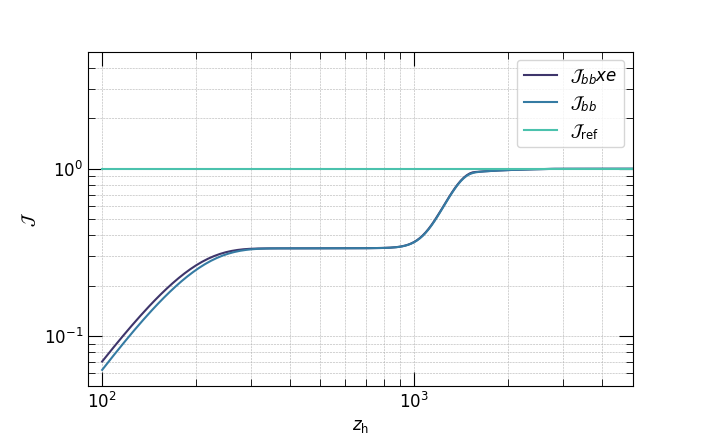

In [26]:
#Plot using the output and not my function integrated
colors2=sns.color_palette("mako",3) #also nice
Jbb = np.array(Jbb)
fig, ax = plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Late time visibility function with hubble cooling ")

ax.plot(z_vis, Jbb2, color = colors2[0], label= "$\mathcal{J}_{bb} xe$")
#ax.plot(z_vis, -Jbb2, color = "purple",linestyle = "dashed")

ax.plot(z_vis, Jbb, color = colors2[1], label= "$\mathcal{J}_{bb}$")
#ax.plot(z_vis, -Jbb, color = "purple",linestyle = "dashed")

ax.plot(z_vis, Jref(z_vis), color = colors2[2],label="$\mathcal{J}_{\mathrm{ref}}$")
#ax.plot(z_vis, -Jref(z_vis), color = "black",linestyle = "dashed")



ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([90, 5e3])
ax.set_ylim([5e-2, 5])

#ax1.set_title("All $\Delta$ I_N curves")

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax.set_ylabel("$\mathcal{J}$")
ax.set_xlabel("$z_{\mathrm{h}}$")

ax.grid(True, which = 'both',  linestyle='--', linewidth=0.4)

#ax1.yaxis.set_major_formatter(ScalarFormatter())    
#ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
ax.legend()
plt.savefig('outputs/p4p/fullJbb2.pdf', dpi=300,bbox_inches="tight")
plt.show()

Theoretical J vs output

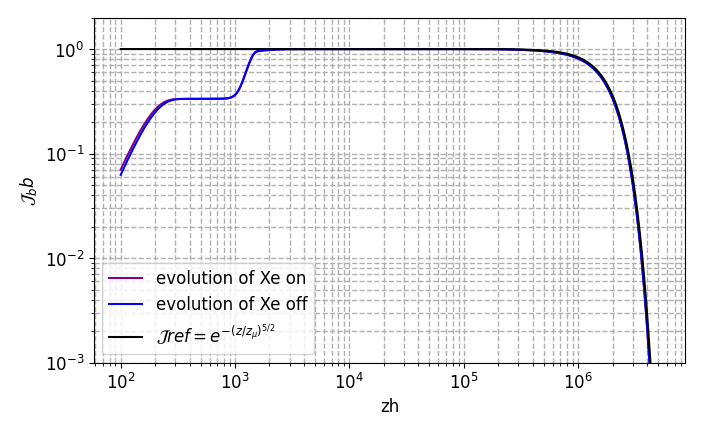

In [27]:
#Plot using the output and not my function integrated

Jbb2 = np.array(Jbb2)
fig, ax = plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Late time visibility function with hubble cooling ")

ax.plot(z_vis2, Jbb2, color = "purple",label="evolution of Xe on")
ax.plot(z_vis2, -Jbb2, color = "purple",linestyle = "dashed")

ax.plot(z_vis, Jbb, color = "blue",label="evolution of Xe off")
ax.plot(z_vis, -Jbb, color = "blue",linestyle = "dashed")

ax.plot(z_vis, Jref(z_vis), color = "black",label="$\mathcal{J}ref = e^{-(z/z_{\mu})^{5/2}}$")
ax.plot(z_vis, -Jref(z_vis), color = "black",linestyle = "dashed")




ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-3, 2])
ax.set_ylabel("$\mathcal{J}_bb$")
ax.set_xlabel("zh")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()





#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

plt.tight_layout()
plt.show()

28


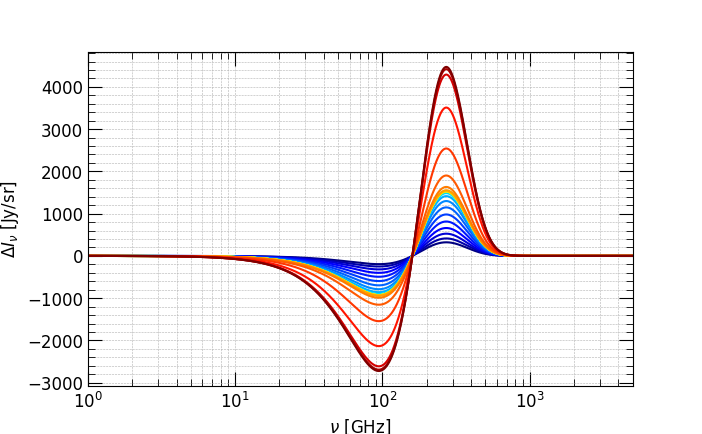

In [28]:
colors = plt.colormaps['jet'].resampled(28)

fig, ax1 = plt.subplots(1, 1, figsize=set_size(width))
col = 0
for i in range(len(z1)):
    if((z1[i]<2000) and (i%5==0)):
        ax1.plot(nu2[i]/1e+9, DI_N2[i], label=f"z = {sci_notation(z1[i])}", color = colors(col))
        col = col +1
print(col)

ax1.set_xscale('log')
#ax1.set_ylim([1e+0, 5e+3])
ax1.set_xlim([1e+0, 5e+3])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")
ax1.set_xlabel("$\\nu$ [GHz]")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
#plt.legend(loc='best')
plt.savefig('outputs/p4p/lateGFI.pdf', dpi=300,bbox_inches="tight")
plt.show()


28


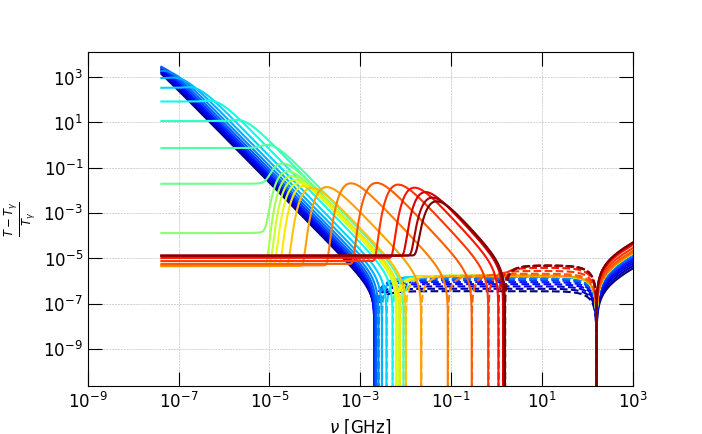

In [29]:
colors = plt.colormaps['jet'].resampled(28)

fig2, ax2 = plt.subplots(1, 1, figsize=set_size(width))
# Plot per DT2 (secondo subplot)
col = 0
for i in range(len(z1)):
    if((z1[i]<2000) and (i%5==0)):
        ax2.plot(nu2[i]/1e9, DT2[i], color = colors(col))
        ax2.plot(nu2[i]/1e9, -DT2[i], color = colors(col), linestyle= "dashed")
        col += 1
print(col)

#colors2 = plt.colormaps['viridis'].resampled(28)
#col=0
#for i in range(len(z1)):
#    if((z1[i]<2000) and (i%5==0)):
#        ax2.plot(nu[i]/1e9, DT[i], color = colors2(col))
#        ax2.plot(nu[i]/1e9, -DT[i], color = colors2(col), linestyle= "dashed")
#        col += 1
#print(col)


ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([1e-9, 1e+3])
#ax2.set_ylim([-0.5e-3, 3e+3])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax2.set_ylabel("$\\frac{T-T_{\gamma}}{T_{\gamma}}$")
ax2.set_xlabel("$\\nu$ [GHz]")

ax2.grid(True, which = 'both',  linestyle='--', linewidth=0.4)

#ax1.yaxis.set_major_formatter(ScalarFormatter())    
#ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.savefig('outputs/p4p/lateGFT.pdf', dpi=300,bbox_inches="tight")
plt.show()

72


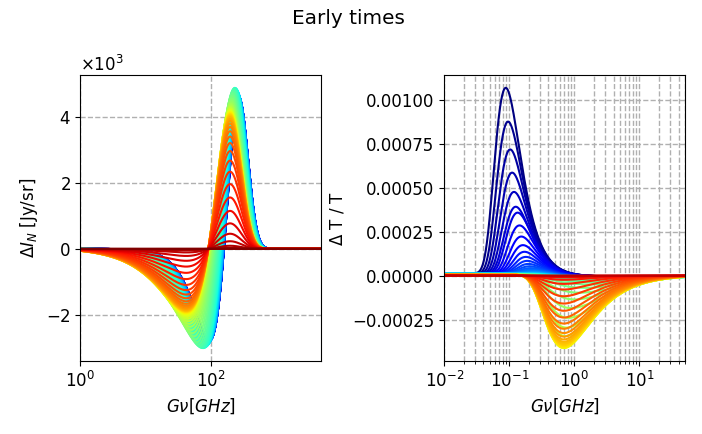

In [30]:
colors = plt.colormaps['jet'].resampled(72)

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=set_size(width))
fig.suptitle(f"Early times ")

# Plot per DI_N2 (primo subplot)
col=0 
for i in range(len(z1)):
    if((z1[i]>2000) and (i%5==0)):
        ax1.plot(nu2[i]/1e9, DI_N2[i], label=f"z = {sci_notation(z1[i])}", color = colors(col))
        col +=1
print(col)

ax1.set_xscale('log')
ax1.set_xlim([1, 5e+3])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("$G\\nu [GHz]$")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax1.legend()

# Plot per DT2 (secondo subplot)
col=0 
for i in range(len(z1)):
    if((z1[i]>3000) and (i%5==0)):
        ax2.plot(nu2[i]/1e9, DT2[i], color = colors(col))
        #ax2.plot(nu2[i], -DT2[i], color = colors(col), linestyle= "dashed")
        col +=1



ax2.set_xscale('log')
#ax2.set_yscale('log')
ax2.set_xlim([1e-2, 5e+1])   #lines on the left
#ax2.set_xlim([5e+11, 1e+13])   #lines on the right
#ax2.set_ylim([-0.2e-3,0.4e-3])

ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("$G\\nu [GHz]$")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

In [31]:
#len(Xe2[0][::-1])

In [32]:
#z1[250]
#
#Xe_int2 = []
#
#for i in range (len(z1)):
#    rev_zxe = zxe[i][::-1]
#    rev_Xe2 = Xe2[i][::-1]
#    Xe_int2.append(CubicSpline(rev_zxe, rev_Xe2))

In [33]:
#colors = plt.colormaps['plasma'].resampled(500)
#fig, ax = plt.subplots(figsize=(10,8))
#
##for i in range (len(z1)):
#    #if(i%4==0):
#ax.plot(z2[0], (Xe_int2[0](z2[0])-Xe_int(z2[0]))/Xe_int(z2[0]), linewidth= "0.8", color = colors(0), linestyle = "solid")
#ax.plot(z2[0], (Xe_int(z2[0])-Xe_int2[0](z2[0]))/Xe_int(z2[0]), linewidth= "0.8", color = colors(0), linestyle = "dashed")
#
##ax.plot(z2[0], Xe_int(z2[0]))   
##ax.plot(z2[0], Xe_int2(z2[0]))  
#
##ax.plot(z[0], Xe[0])   
##ax.plot(z2[0], Xe2[0])
#
#
#
#ax.set_xlabel("z")
#ax.set_ylabel("$Xe_{evolving}-Xe$")
#ax.set_xscale('log')
#ax.set_yscale('log')
##ax.set_xlim([1e2, 1e7])
#ax.grid(True, which = 'both',  linestyle='--', linewidth=0.5)
#ax.legend(fontsize=12)

we may want to interpolate since the redshift grid is different

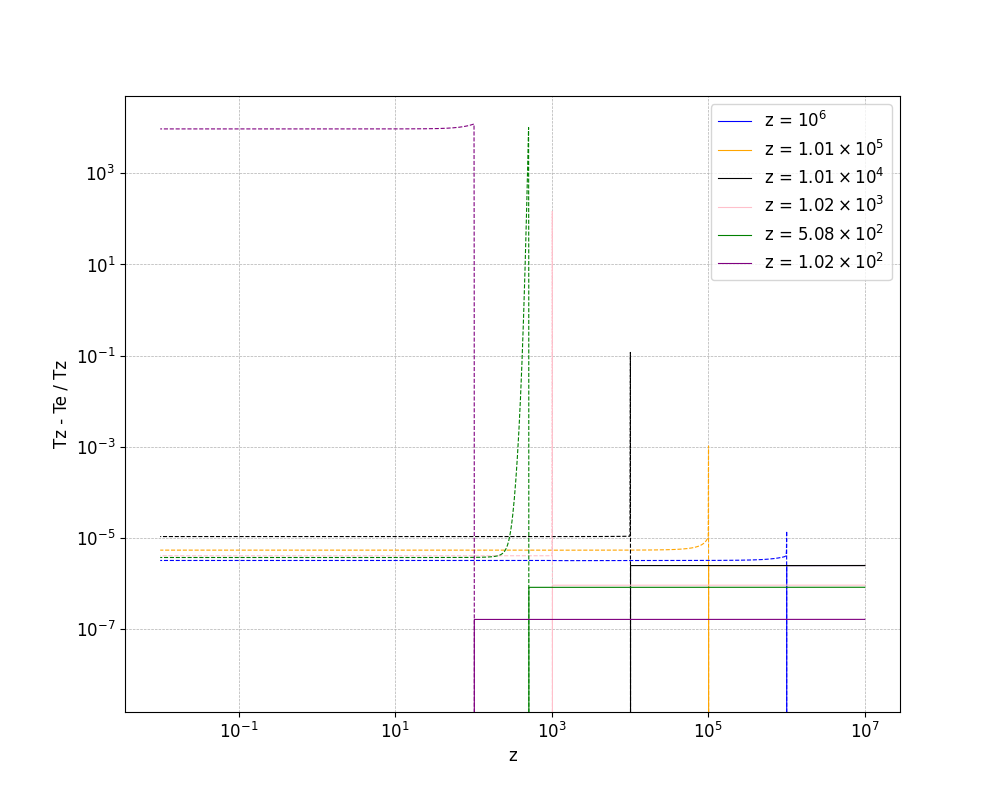

In [34]:
fig, ax = plt.subplots( figsize=(10,8))

for i in range (len(z1)):
    if(z1[i]>1e6):
        ax.plot(z2[i], (Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "blue", label=f"z = {sci_notation(z1[i])}",linestyle = "solid")
        ax.plot(z2[i], -(Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "blue", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e5):
        ax.plot(z2[i], (Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "orange",label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -(Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "orange", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e4):
        ax.plot(z2[i], (Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "black", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -(Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "black", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e3):
        ax.plot(z2[i], (Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "pink", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -(Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "pink", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>5e2):
        ax.plot(z2[i], (Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "green", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -(Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "green", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e2):
        ax.plot(z2[i], (Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "purple", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -(Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "purple", linestyle = "dashed")
        break



ax.set_xlabel("z")
ax.set_ylabel("Tz - Te / Tz")
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([1e2, 1e7])
ax.grid(True, which = 'both',  linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)

The fact that the peaks are smaller at high redshift also depends on the sampling in time, if the termalisation is very quick, and the time step not short enough, maybe the full peak is not visible.

In [35]:
#colors = plt.colormaps['Spectral'].resampled(7)
#fig, ax = plt.subplots( figsize=set_size(width))
#plt.style.library['tableau-colorblind10']
#
#
#ax.plot(z[0], Xe_int(z2[0]), label= "No energy injection",color = colors(0))  
#
#
#
#for i in range (len(z1)):
#    if(z1[i]>1e6):
#        ax.plot(z2[i], Xe_int2[i](z2[i]), linewidth= "1", color = colors(1), label=f"z = {sci_notation(z1[i])}",linestyle = "solid")
#        break
#
#for i in range (len(z1)):
#    if(z1[i]>1e5):
#        ax.plot(z2[i], Xe_int2[i](z2[i]), linewidth= "1", color = colors(2),label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
#        break
#
#for i in range (len(z1)):
#    if(z1[i]>1e4):
#        ax.plot(z2[i], Xe_int2[i](z2[i]), linewidth= "1", color = colors(3), label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
#        break
#
#for i in range (len(z1)):
#    if(z1[i]>1e3):
#        ax.plot(z2[i], Xe_int2[i](z2[i]), linewidth= "1", color = colors(4), label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
#        break
#
#for i in range (len(z1)):
#    if(z1[i]>5e2):
#        ax.plot(z2[i], Xe_int2[i](z2[i]), linewidth= "1", color = colors(5), label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
#        break
#
#for i in range (len(z1)):
#    if(z1[i]>1e2):
#        ax.plot(z2[i], Xe_int2[i](z2[i]), linewidth= "1", color = colors(6), label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
#        break
#
#
##ax.plot(z[0], Xe[0])   
##ax.plot(z2[0], Xe2[0])
#
#
#
#ax.set_xlabel("z",fontsize=12)
#ax.set_ylabel("${\\rm X_e}$",fontsize=12)
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim([0.005, 1e3])
#ax.set_ylim([1e-4, 5e-3])
#ax.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
#ax.legend(fontsize=10)
#plt.savefig('outputs/p4p/xe.pdf')